<a href="https://colab.research.google.com/github/aworklab/everydayPython/blob/main/ex_20220525.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 오늘의 목표 
* GridSearchCv
* RFM

In [89]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime, date, time, timezone, timedelta
import dateutil.parser as dtparser
import plotnine as gg
from plotnine import ggplot, aes
import os

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, RobustScaler
from sklearn.decomposition import PCA 
from sklearn.impute import KNNImputer
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.metrics import roc_curve, roc_auc_score, accuracy_score, mean_squared_error
import sklearn.datasets as skd

# GridSearchCV

In [11]:
raw = skd.load_boston()
X = pd.DataFrame(raw['data'], columns = raw['feature_names'])
y = raw['target']
X.head()

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (i.e.

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [13]:
X.columns = [a.lower() for a in X.columns]
X.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [14]:
X.isnull().sum()

crim       0
zn         0
indus      0
chas       0
nox        0
rm         0
age        0
dis        0
rad        0
tax        0
ptratio    0
b          0
lstat      0
dtype: int64

In [15]:
x_tr, x_te, y_tr, y_te = train_test_split(X, y, train_size = .7)

In [17]:
scaler = StandardScaler()
x_tr_std = scaler.fit_transform(x_tr)
x_te_std = scaler.transform(x_te)

In [21]:
fit_rf = RandomForestRegressor().fit(x_tr_std, y_tr)
pred_rf = fit_rf.predict(x_te_std)

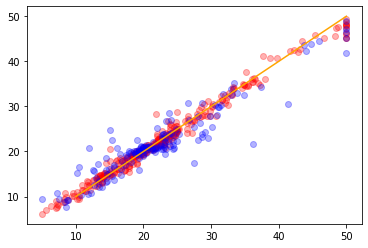

In [33]:
plt.plot(y_tr, fit_rf.predict(x_tr_std), 'o',color = 'red', alpha = .3)
plt.plot(y_te, pred_rf, 'o', color = 'blue', alpha = .3)
plt.plot([10,50], [10,50], color = 'orange')

In [35]:
fit_rf.estimator_params

('criterion',
 'max_depth',
 'min_samples_split',
 'min_samples_leaf',
 'min_weight_fraction_leaf',
 'max_features',
 'max_leaf_nodes',
 'min_impurity_decrease',
 'random_state',
 'ccp_alpha')

In [36]:
params = {'n_estimators' : [10, 50, 100],
          'min_samples_split' : [8, 16, 20],
          'min_samples_leaf' : [8 ,12, 18],       
          'max_depth' : [4, 6, 8, 10, 12, 16]       
        }

In [38]:
fit_gr = GridSearchCV(fit_rf, param_grid = params, scoring = 'accuracy', n_jobs = -1, verbose = True)

In [39]:
fit_gr.fit(x_tr_std, y_tr)

Fitting 5 folds for each of 162 candidates, totalling 810 fits


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_search.py:972: UserWarning: One or more of the test scores are non-finite: [nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan]
  category=UserWarning,


GridSearchCV(estimator=RandomForestRegressor(), n_jobs=-1,
             param_grid={'max_depth': [4, 6, 8, 10, 12, 16],
                         'min_samples_leaf': [8, 12, 18],
                         'min_samples_split': [8, 16, 20],
                         'n_estimators': [10, 50, 100]},
             scoring='accuracy', verbose=True)

In [40]:
fit_gr.best_params_

{'max_depth': 4,
 'min_samples_leaf': 8,
 'min_samples_split': 8,
 'n_estimators': 10}

In [43]:
fit_gr.cv_results_.keys()

dict_keys(['mean_fit_time', 'std_fit_time', 'mean_score_time', 'std_score_time', 'param_max_depth', 'param_min_samples_leaf', 'param_min_samples_split', 'param_n_estimators', 'params', 'split0_test_score', 'split1_test_score', 'split2_test_score', 'split3_test_score', 'split4_test_score', 'mean_test_score', 'std_test_score', 'rank_test_score'])

In [44]:
pd.DataFrame(np.c_[fit_gr.cv_results_['params'], fit_gr.cv_results_['mean_test_score'],
                   fit_gr.cv_results_['std_test_score'], fit_gr.cv_results_['rank_test_score']
                   ],
             columns = ['params', 'mean_test_score', 'std_test_score', 'rank_test_score']
             )

,params,mean_test_score,std_test_score,rank_test_score
0,"{'max_depth': 4, 'min_samples_leaf': 8, 'min_s...",NaN,NaN,1
1,"{'max_depth': 4, 'min_samples_leaf': 8, 'min_s...",NaN,NaN,103
2,"{'max_depth': 4, 'min_samples_leaf': 8, 'min_s...",NaN,NaN,104
3,"{'max_depth': 4, 'min_samples_leaf': 8, 'min_s...",NaN,NaN,105
4,"{'max_depth': 4, 'min_samples_leaf': 8, 'min_s...",NaN,NaN,106
...,...,...,...,...
157,"{'max_depth': 16, 'min_samples_leaf': 18, 'min...",NaN,NaN,55
158,"{'max_depth': 16, 'min_samples_leaf': 18, 'min...",NaN,NaN,56
159,"{'max_depth': 16, 'min_samples_leaf': 18, 'min...",NaN,NaN,57
160,"{'max_depth': 16, 'min_samples_leaf': 18, 'min...",NaN,NaN,121


In [46]:
fit_rf_best = RandomForestRegressor(max_depth = 4, min_samples_leaf = 8,
                                    min_samples_split = 8, n_estimators = 10).fit(x_tr_std, y_tr)
pred_rf_best = fit_rf_best.predict(x_te_std)

In [48]:
mean_squared_error(y_te, pred_rf)**0.5, mean_squared_error(y_te, pred_rf_best)**0.5

(3.100763385421148, 3.567223214443588)

In [63]:
importance_table = pd.DataFrame(np.c_[np.array(x_tr.columns).reshape(-1,1), fit_rf.feature_importances_], columns = ['col', 'value'])
importance_table = importance_table.sort_values(['value'], ascending = False)
importance_table

,col,value
12,lstat,0.444549
5,rm,0.341481
7,dis,0.075113
0,crim,0.040237
4,nox,0.020847
6,age,0.019949
10,ptratio,0.017919
11,b,0.015814
9,tax,0.011215
2,indus,0.006153


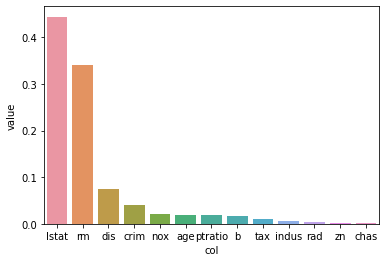

In [64]:
sns.barplot(data = importance_table, x = 'col', y = 'value')

# RFM

In [76]:
list_file = pd.DataFrame(os.listdir(), columns = ['file']).assign(flag = lambda x : x['file'].str.contains('.+csv$'))
list_file = list_file[list_file['flag'] == True]
list_file

,file,flag
1,retail_data_transactions.csv,True
2,retail_data_response.csv,True


In [80]:
df_trans = pd.read_csv(list_file.iloc[0,0])
df_respond = pd.read_csv(list_file.iloc[1,0])

In [81]:
df_trans.head()

,customer_id,trans_date,tran_amount
0,CS5295,11-Feb-13,35
1,CS4768,15-Mar-15,39
2,CS2122,26-Feb-13,52
3,CS1217,16-Nov-11,99
4,CS1850,20-Nov-13,78


In [82]:
df_respond.head()

,customer_id,response
0,CS1112,0
1,CS1113,0
2,CS1114,1
3,CS1115,1
4,CS1116,1


In [102]:
df_trans['trans_date'] = pd.to_datetime(df_trans['trans_date'])
df_trans.head()

,customer_id,trans_date,tran_amount
0,CS5295,2013-02-11,35
1,CS4768,2015-03-15,39
2,CS2122,2013-02-26,52
3,CS1217,2011-11-16,99
4,CS1850,2013-11-20,78


In [103]:
df_trans.shape, df_respond.shape

((125000, 3), (6884, 2))

In [113]:
df = pd.merge(df_trans, df_respond, how = 'left', on = 'customer_id')
df = df.assign(response = lambda x : np.where(x['response'] == 1, 'o', 'x'))
df = df.sort_values(['customer_id', 'trans_date'], ascending = [1, 0])
df.head()

,customer_id,trans_date,tran_amount,response
5650,CS1112,2015-01-14,39,x
31500,CS1112,2014-12-04,59,x
17810,CS1112,2014-07-16,90,x
26626,CS1112,2014-04-29,63,x
74842,CS1112,2013-11-13,71,x


In [108]:
df.head()

,customer_id,trans_date,tran_amount,response
0,CS5295,2013-02-11,35,1.0
1,CS4768,2015-03-15,39,1.0
2,CS2122,2013-02-26,52,0.0
3,CS1217,2011-11-16,99,0.0
4,CS1850,2013-11-20,78,0.0


In [141]:
info_r = df.groupby(['customer_id']).apply(lambda x : np.max(x['trans_date'])).reset_index()
info_r.columns = ['customer_id', 'recency']

In [142]:
info_f = df.groupby(['customer_id']).apply(lambda x : len(x)).reset_index()
info_f.columns = ['customer_id', 'freq']

In [145]:
info_m = df.groupby(['customer_id']).apply(lambda x : sum(x['tran_amount'])).reset_index()
info_m.columns = ['customer_id', 'money']

In [150]:
info = pd.merge(info_r, info_f, how = 'left', on = 'customer_id')
info = pd.merge(info, info_m, how = 'left', on = 'customer_id')
info.head()

,customer_id,recency,freq,money
0,CS1112,2015-01-14,15,1012
1,CS1113,2015-02-09,20,1490
2,CS1114,2015-02-12,19,1432
3,CS1115,2015-03-05,22,1659
4,CS1116,2014-08-25,13,857


In [173]:
df.assign(recency_date = lambda x: 
          x.groupby(['customer_id'])['trans_date'].apply(lambda y : 
                                                          np.max(y) + pd.DateOffset(days = 1) - y)
         )

,customer_id,trans_date,tran_amount,response,recency_date
5650,CS1112,2015-01-14,39,x,1 days
31500,CS1112,2014-12-04,59,x,42 days
17810,CS1112,2014-07-16,90,x,183 days
26626,CS1112,2014-04-29,63,x,261 days
74842,CS1112,2013-11-13,71,x,428 days
...,...,...,...,...,...
123448,CS9000,2012-06-01,37,x,1003 days
106580,CS9000,2012-05-23,77,x,1012 days
110180,CS9000,2012-05-12,53,x,1023 days
103206,CS9000,2011-10-23,23,x,1225 days


In [186]:
df.assign(recency_date = lambda a : a.groupby(['customer_id']).apply(lambda x : np.max(x['trans_date']).to_numpy().astype('datetime64[D]') -
                                  x['trans_date'].to_numpy().astype('datetime64[D]') + 1))

,customer_id,trans_date,tran_amount,response,recency_date
5650,CS1112,2015-01-14,39,x,NaN
31500,CS1112,2014-12-04,59,x,NaN
17810,CS1112,2014-07-16,90,x,NaN
26626,CS1112,2014-04-29,63,x,NaN
74842,CS1112,2013-11-13,71,x,NaN
...,...,...,...,...,...
123448,CS9000,2012-06-01,37,x,NaN
106580,CS9000,2012-05-23,77,x,NaN
110180,CS9000,2012-05-12,53,x,NaN
103206,CS9000,2011-10-23,23,x,NaN


In [187]:
txt = ["df.assign(recency_date = lambda x: x.groupby(['customer_id'])['trans_date'].apply(lambda y : np.max(y) + pd.DateOffset(days = 1) - y))",
       "df.assign(recency_date = lambda a : a.groupby(['customer_id']).apply(lambda x : np.max(x['trans_date']).to_numpy().astype('datetime64[D]') - x['trans_date'].to_numpy().astype('datetime64[D]') + 1))"        
         ]

In [208]:
res = []
for i in range(len(txt)) :
  print(str(i) + 'starting')
  temp_txt = txt[i]

  tester = []
  for j in range(100) :

    s_time = datetime.now()
    eval(temp_txt)
    e_time = datetime.now()
    tester.append(e_time - s_time)
  
  res.append(np.mean(tester))

0starting
1starting


In [224]:
res_tbl = pd.DataFrame(np.c_[np.array(['pd', 'np']).reshape(-1,1),
                             np.array(res).reshape(-1,1)],
                                    columns = ['type', 'time'])
res_tbl = res_tbl.assign(time2 = lambda x : x['time'].astype(int))
res_tbl

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: FutureWarning: casting timedelta64[ns] values to int64 with .astype(...) is deprecated and will raise in a future version. Use .view(...) instead.
  after removing the cwd from sys.path.


,type,time,time2
0,pd,0 days 00:00:03.761471,3761471000
1,np,0 days 00:00:02.132003,2132003000


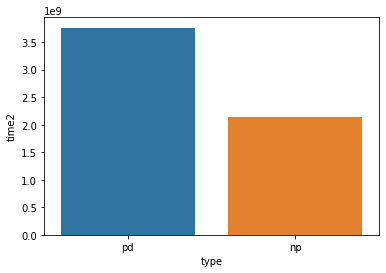

In [225]:
sns.barplot(data = res_tbl, x = 'type' , y = 'time2')